<a href="https://colab.research.google.com/github/leesujin1209/BlockChain/blob/main/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

스케일링 한 본래 코드.

[1]
1.0
0.6923076923076923
[1]


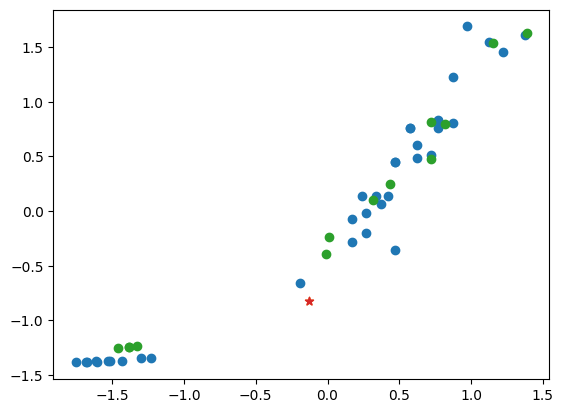

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
kn = KNeighborsClassifier(n_neighbors=5)

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
               31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
               35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
               10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
               500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
               7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = [1]*35 + [0]*14

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,stratify=fish_target ,random_state=42)

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
train_scaled = (train_input - mean)/std
#print(mean) //std

mean = np.mean(test_input, axis=0)
std = np.std(test_input, axis=0)
test_scaled = (test_input - mean)/std

kn.fit(train_scaled, train_target)
new=([25, 150] - mean) / std
print(kn.predict([new]))

kn.fit(test_scaled, test_target)
print(kn.score(test_scaled, test_target))      #정확도 함수 score
print(kn.score(test_input,test_target))

new=([25, 150] - mean) / std
print(kn.predict([new]))

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='*')

plt.scatter(test_scaled[:,0], test_scaled[:,1])
plt.scatter(new[0], new[1], marker='*')
plt.show()

스케일링 하지 않은 코드

Train score: 1.0
Test score: 1.0
New sample prediction: [0]


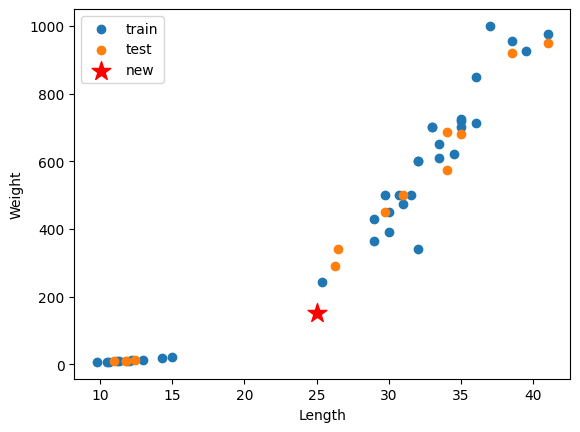

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
               31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
               35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
               10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
               500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
               7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


fish_data = np.column_stack((fish_length, fish_weight))
fish_target = [1]*35 + [0]*14

# 훈련/테스트 분리
train_input, test_input, train_target, test_target = train_test_split(
fish_data, fish_target, stratify=fish_target, random_state=42)

# 모델 학습 (스케일링 없음)
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_input, train_target)

# 정확도 확인
print("Train score:", kn.score(train_input, train_target))
print("Test score:", kn.score(test_input, test_target))

# 새로운 샘플 예측
new = np.array([25, 150])
print("New sample prediction:", kn.predict([new]))

# 시각화
plt.scatter(train_input[:,0], train_input[:,1], label="train")
plt.scatter(test_input[:,0], test_input[:,1], label="test")
plt.scatter(new[0], new[1], marker='*', color='red', s=200, label="new")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.legend()
plt.show()


In [ ]:
스케일링 전/후